In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

**Question 1**

In [2]:
def lorenz(sigma,rho,beta,u0,t0,tf,N,plot_vars=[0,1]):
    '''Compute a numerical approximation of the Lorenz equations:
    
    x' = sigma*(y - x)
    y' = x*(rho - z) - y
    z' = x*y - beta*z
    
    Parameters
    ----------
    sigma,rho,beta : numbers, parameters in the Lorenz equations
    u0 : list of length 3, initial conditions [x(t0),y(t0),z(t0)]
    t0 : number, initial time value
    tf : number, final time value
    N : integer, number of evenly spaced t values from t0 to tf (inclusively)
        at which to find x,y,z values
    plot_vars : list of length 2, the indices of variables to plot where
        x=0, y=1, z=2 (default value [0,1] which plots x versus y)
    
    Returns
    -------
    Matrix of size (N,4) where column at 0 contains t array, column at 1 contains x array,
    column at 2 contains y array, column at 3 contains z array. Function also plots
    the solution.
    '''
    def f(u,t):
        dudt = np.zeros(3)
        dudt[0] = sigma*(u[1] - u[0])
        dudt[1] = u[0]*(rho - u[2]) - u[1]
        dudt[2] = u[0]*u[1] - beta*u[2]
        return dudt
    
    t = np.linspace(t0,tf,N)
    U = odeint(f,u0,t)
    i = plot_vars[0]
    j = plot_vars[1]
    plt.plot(U[:,i],U[:,j])
    return np.column_stack([t,U])

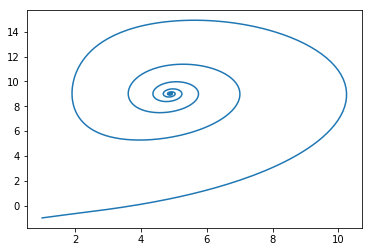

In [3]:
lorenz(28,10,8/3,[1,1,-1],0,10,2000,[1,2]);

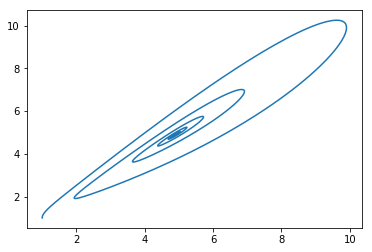

In [4]:
lorenz(28,10,8/3,[1,1,-1],0,10,2000,[0,1]);

**Question 2**

In [5]:
def damping(m,b,k,F,u0,t0,tf,N):
    '''Compute a numerical approximation of the damping equation: m*y'' + b*y'*|y'| + k*y = F(t)
    
    Parameters
    ----------
    m,b,k : positive numbers, parameters in the damping equation
    F : function of one variable F(t) in the damping equation
    u0 : list of length 2, initial conditions [y(t0),y'(t0)]
    t0 : number, initial time value
    tf : number, final time value
    N : integer, number of evenly spaced t values from t0 to tf (inclusively)
        at which to find x,y,z values
   
    Returns
    -------
    Matrix of size (N,2) where column at 0 contains t array and column at 1 contains y array.
    Function also plots the solution.
    '''
    def f(u,t):
        dudt = np.zeros(2)
        dudt[0] = u[1]
        dudt[1] = (1/m)*(F(t) - b*u[1]*np.abs(u[1]) - k*u[0])
        return dudt
    
    t = np.linspace(t0,tf,N)
    U = odeint(f,u0,t)
    plt.plot(t,U[:,0])
    return np.column_stack([t,U[:,0]])

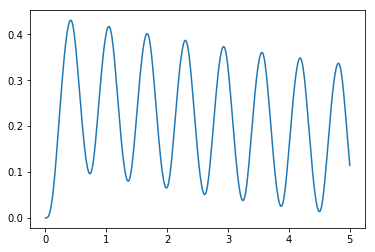

In [6]:
damping(1,5,1,lambda t: 20*np.sin(10*t),[0,0],0,5,500);

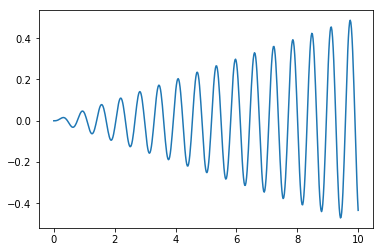

In [7]:
damping(1,0,100,lambda t: np.sin(10*t),[0,0],0,10,500);